In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/UTKFace.tar.gz" .
!tar xvzf UTKFace.tar.gz &> /dev/null
from tensorflow.keras import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorboard
import os
dot = '.'
underline = '_'
White =  "White"
Black  = "Black" 
Asian  = "Asian" 
Indian = "Indian" 
Others = "Others"

image = 'image'
Race  = 'Race'

img_path = list()
Races = list()

path = "/content/UTKFace"


for img in os.listdir(path):
  temp = img.split(dot)

  if len(temp[0].split(underline)) != 4:
    continue
  img_path.append(os.path.join(path, img))
  age, gender, race, date = temp[0].split(underline)
  Races.append(int(race))



classLabels = {0:White, 1:Black, 2:Asian, 3:Indian, 4:Others}

Races = [str(utils.to_categorical(i, len(classLabels))) for i in Races]

df = pd.DataFrame({
    image : img_path,
    Race : Races
})


dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.3
)
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = image,
    y_col = Race,
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
    subset = "training",
    shuffle = True
)
TestData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = image,
    y_col = Race,
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
    subset = "validation",
    shuffle = True
)

Mounted at /content/drive
Found 16594 validated image filenames belonging to 5 classes.
Found 7111 validated image filenames belonging to 5 classes.


In [ ]:
LEARNING_RATE = 0.01
LOSS = "categorical_crossentropy"
METRICS = "accuracy"
EPOCH = 8

input = layers.Input(shape = (10000, ))
output1 = layers.Flatten()(input)
output2 = layers.Dense(1024, activation = "relu")(output1)
output2 = layers.Dense(512, activation = "relu")(output1)
output3 = layers.Dense(2,  activation = "relu")(output2)
output4 = layers.Dense(5,  activation = "softmax")(output3)
model = models.Model(inputs = input, outputs = output4)
model.compile(optimizer=optimizers.SGD(learning_rate=LEARNING_RATE), loss = LOSS, metrics=[METRICS])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 15        
Total params: 5,121,553
Trainable params: 5,121,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(TrainData, validation_data=TestData, epochs = EPOCH)

Epoch 1/8
519/519 [==============================] - 24s 41ms/step - loss: 1.5110 - accuracy: 0.4226 - val_loss: 1.4657 - val_accuracy: 0.4279
Epoch 2/8
519/519 [==============================] - 21s 40ms/step - loss: 1.4554 - accuracy: 0.4239 - val_loss: 1.4528 - val_accuracy: 0.4279
Epoch 3/8
519/519 [==============================] - 21s 40ms/step - loss: 1.4487 - accuracy: 0.4239 - val_loss: 1.4512 - val_accuracy: 0.4279
Epoch 4/8
519/519 [==============================] - 21s 40ms/step - loss: 1.4469 - accuracy: 0.4239 - val_loss: 1.4510 - val_accuracy: 0.4279
Epoch 5/8
519/519 [==============================] - 21s 40ms/step - loss: 1.4463 - accuracy: 0.4239 - val_loss: 1.4512 - val_accuracy: 0.4279
Epoch 6/8
519/519 [==============================] - 21s 40ms/step - loss: 1.4460 - accuracy: 0.4239 - val_loss: 1.4514 - val_accuracy: 0.4279
Epoch 7/8
519/519 [==============================] - 21s 40ms/step - loss: 1.4459 - accuracy: 0.4239 - val_loss: 1.4516 - val_accuracy: 0.4279

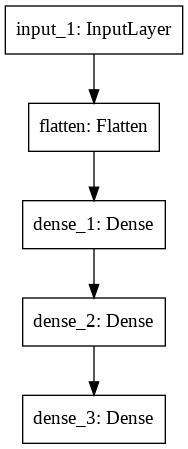

In [ ]:
plot_model(model)

In [ ]:
from keras import backend as K

input1 = model.input               # input placeholder

outputtt = [layer.output for layer in model.layers]# all layer outputs

# fun = K.function([input1, K.learning_phase()],outputtt)# evaluation function

# Testing

t = np.random.random(100)[np.newaxis,...]

# layer_outputs = fun([t, 1.])
outputtt

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_3')>]

In [ ]:
from keras import backend as K

def layer_to_visualize(mylayer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [mylayer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

# Specify the layer to want to visualize
layer_to_visualize(output3)

AttributeError: ignored